<a href="https://colab.research.google.com/github/DeepeshAhuja/Laptop-Price-Prediction-ML-Project/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2808]:
## importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# to remove all the warnings
import warnings
warnings.filterwarnings('ignore')

In [2809]:
#reading the dataset
df=pd.read_csv('/content/laptopData.csv')

In [2810]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [2811]:
# Checking the missing values
df.isna().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [2812]:
#first five values
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [2813]:
# columns
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [2814]:
# dropping column Unnamed: 0
df.drop(columns='Unnamed: 0',inplace=True)

In [2815]:
#how many non null values is there in each attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [2816]:
# shape of dataset
df.shape

(1303, 11)

In [2817]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [2818]:
df.describe()

,Price
count,1273.000000
mean,59955.814073
std,37332.251005
min,9270.720000
25%,31914.720000
50%,52161.120000
75%,79333.387200
max,324954.720000


In [2819]:
len(df[df['Company'].isna()])

30

In [2820]:
# data of missing values
df[df['Company'].isna()]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2821]:
# to know the count of all values in attribute company
df['Company'].value_counts()

Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: Company, dtype: int64

In [2822]:
df[df.duplicated]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2823]:
# as the duplicate values is same as null values, so dropping duplicate will remove null values
df.drop_duplicates(inplace=True)

In [2824]:
df.isnull().sum()

Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

In [2825]:
# data of missing values
def missing_values(x):
  print(df[x].isna())
for i in df.columns:
  missing_values(i)  

0       False
1       False
2       False
3       False
4       False
        ...  
1269    False
1270    False
1271    False
1272    False
1273    False
Name: Company, Length: 1245, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
1269    False
1270    False
1271    False
1272    False
1273    False
Name: TypeName, Length: 1245, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
1269    False
1270    False
1271    False
1272    False
1273    False
Name: Inches, Length: 1245, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
1269    False
1270    False
1271    False
1272    False
1273    False
Name: ScreenResolution, Length: 1245, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
1269    False
1270    False
1271    False
1272    False
1273    False
Name: Cpu, Length: 1245, dtype: bool
0       False
1     

In [2826]:
# 20th row in dataset
df.iloc[20]

Company             NaN
TypeName            NaN
Inches              NaN
ScreenResolution    NaN
Cpu                 NaN
Ram                 NaN
Memory              NaN
Gpu                 NaN
OpSys               NaN
Weight              NaN
Price               NaN
Name: 20, dtype: object

In [2827]:
#dropping 20th row as it is the only missing value
df.drop(index=20,axis=0,inplace=True)

In [2828]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [2829]:
df.shape

(1244, 11)

In [2830]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1270,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1272,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [2831]:
# reseting index
df.reset_index()

,index,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1239,1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1240,1270,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1241,1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1242,1272,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200


In [2832]:
# df1=df.copy()

In [2833]:
df['Inches'].value_counts()

15.6    621
14      188
17.3    162
13.3    157
12.5     38
11.6     29
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: Inches, dtype: int64

In [2834]:
# replacing ? with null value
# df1.replace('?', np.NaN, inplace=True)


In [2835]:
# df1['Inches'].fillna(method=df1['Inches'].median(),inplace=True)


In [2836]:
# dropping that index having '?'
df.drop(index=df[df['Inches']=='?'].index[0],inplace=True)

In [2837]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [2838]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                492
1366x768                                         255
IPS Panel Full HD 1920x1080                      222
IPS Panel Full HD / Touchscreen 1920x1080         50
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Retina Display 2880x1800            

In [2839]:
# extracting only screen resolution
df['ScreenResolution']=df['ScreenResolution'].apply(lambda x: x.split(" ")[-1])

In [2840]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [2841]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    141
Intel Core i7 7500U 2.7GHz     126
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 6440HQ 2.6GHz      1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

In [2842]:
# extracting only cpu speed ie GHz and only float values
df['GHz']=df['Cpu'].apply(lambda x: float(x.split(" ")[-1][0:-3]))

In [2843]:
df['GHz'].value_counts()

2.50    278
2.80    160
2.70    158
1.60    118
2.30     84
2.00     84
1.80     77
2.60     73
1.10     53
2.40     50
2.90     19
3.00     19
1.20     15
2.20     11
1.50     10
1.44     10
1.30      6
3.60      5
3.10      3
2.10      3
1.90      2
0.90      2
3.20      1
1.00      1
1.92      1
Name: GHz, dtype: int64

In [2844]:
# dropping cpu as it is not needed
df.drop(columns='Cpu',inplace=True)

In [2845]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'Price', 'GHz'],
      dtype='object')

In [2846]:
df['Ram'].value_counts()

8GB     594
4GB     358
16GB    192
6GB      34
12GB     25
32GB     17
2GB      16
64GB      3
24GB      3
1GB       1
Name: Ram, dtype: int64

In [2847]:
# extracting ram size from ram only int value
df['Ram']=df['Ram'].apply(lambda x: int(x[0:-2]))

In [2848]:
df['Memory'].value_counts()

256GB SSD                        400
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [2849]:
# dropping particular index where '?' is there
df.drop(index=df[df['Memory']=='?'].index[0],inplace=True)

In [2850]:
# converting all the values in one unit ie GB 
df['Memory(GB)']=df['Memory'].apply(lambda x: x.split(" ")[0][0:-2]).replace({"1":"1000","1.0":"1000","2":"2000"}).astype('int')

In [2851]:
df

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,GHz,Memory(GB)
0,Apple,Ultrabook,13.3,2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2.3,128
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1.8,128
2,HP,Notebook,15.6,1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,2.5,256
3,Apple,Ultrabook,15.4,2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2.7,512
4,Apple,Ultrabook,13.3,2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,3.1,256
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496,2.5,500
1270,Lenovo,2 in 1 Convertible,14,1920x1080,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,2.5,128
1271,Lenovo,2 in 1 Convertible,13.3,3200x1800,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,2.5,512
1272,Lenovo,Notebook,14,1366x768,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1.6,64


In [2852]:
# extracting only int values
df['MemoryType']=df['Memory'].apply(lambda x: x.split(" ")[1])

In [2853]:
df

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,GHz,Memory(GB),MemoryType
0,Apple,Ultrabook,13.3,2560x1600,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2.3,128,SSD
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1.8,128,Flash
2,HP,Notebook,15.6,1920x1080,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,2.5,256,SSD
3,Apple,Ultrabook,15.4,2880x1800,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2.7,512,SSD
4,Apple,Ultrabook,13.3,2560x1600,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,3.1,256,SSD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496,2.5,500,HDD
1270,Lenovo,2 in 1 Convertible,14,1920x1080,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,2.5,128,SSD
1271,Lenovo,2 in 1 Convertible,13.3,3200x1800,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,2.5,512,SSD
1272,Lenovo,Notebook,14,1366x768,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1.6,64,Flash


In [2854]:
# dropping memory as it is not needed
df.drop(columns='Memory',inplace=True)

In [2855]:
# dropping gpu as it is not needed
df.drop(columns='Gpu',inplace=True)

In [2856]:
df['Weight'].value_counts()

2.2kg     106
2.1kg      57
2.4kg      41
2.5kg      37
2.3kg      36
         ... 
4.1kg       1
1.41kg      1
3.6kg       1
4.7kg       1
4.0kg       1
Name: Weight, Length: 189, dtype: int64

In [2857]:
# dropping particular index where '?' is there
df.drop(index=df[df['Weight']=="?"].index[0],inplace=True)

In [2858]:
df['Weight']

0       1.37kg
1       1.34kg
2       1.86kg
3       1.83kg
4       1.37kg
         ...  
1269     2.2kg
1270     1.8kg
1271     1.3kg
1272     1.5kg
1273    2.19kg
Name: Weight, Length: 1241, dtype: object

In [2859]:
# extracting only int values
df['Weight']=df['Weight'].apply(lambda x: float(x[0:-2]))

In [2860]:
df['Weight']

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1269    2.20
1270    1.80
1271    1.30
1272    1.50
1273    2.19
Name: Weight, Length: 1241, dtype: float64

In [2861]:
# converting its datatype to float
df['Inches']=df['Inches'].astype('float')

In [2862]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1241 non-null   object 
 1   TypeName          1241 non-null   object 
 2   Inches            1241 non-null   float64
 3   ScreenResolution  1241 non-null   object 
 4   Ram               1241 non-null   int64  
 5   OpSys             1241 non-null   object 
 6   Weight            1241 non-null   float64
 7   Price             1241 non-null   float64
 8   GHz               1241 non-null   float64
 9   Memory(GB)        1241 non-null   int64  
 10  MemoryType        1241 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 116.3+ KB


In [2863]:
# function to plot countplot graph
def make_plot(feature_name):
  plt.figure(figsize=(12,8))
  ax=sns.countplot(x=feature_name,data=df)
  plt.xlabel(feature_name)
  plt.xticks(rotation=45)
  plt.title('{} vs Count'.format(feature_name))
  plt.legend()

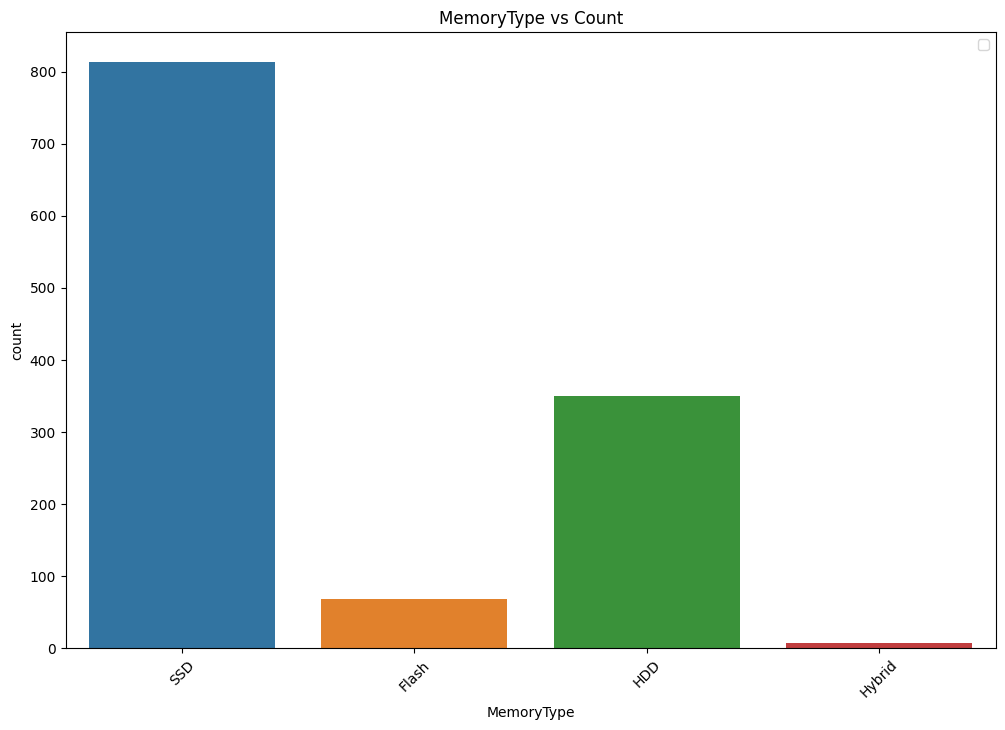

In [2864]:
# count plot of Memory type
make_plot('MemoryType')

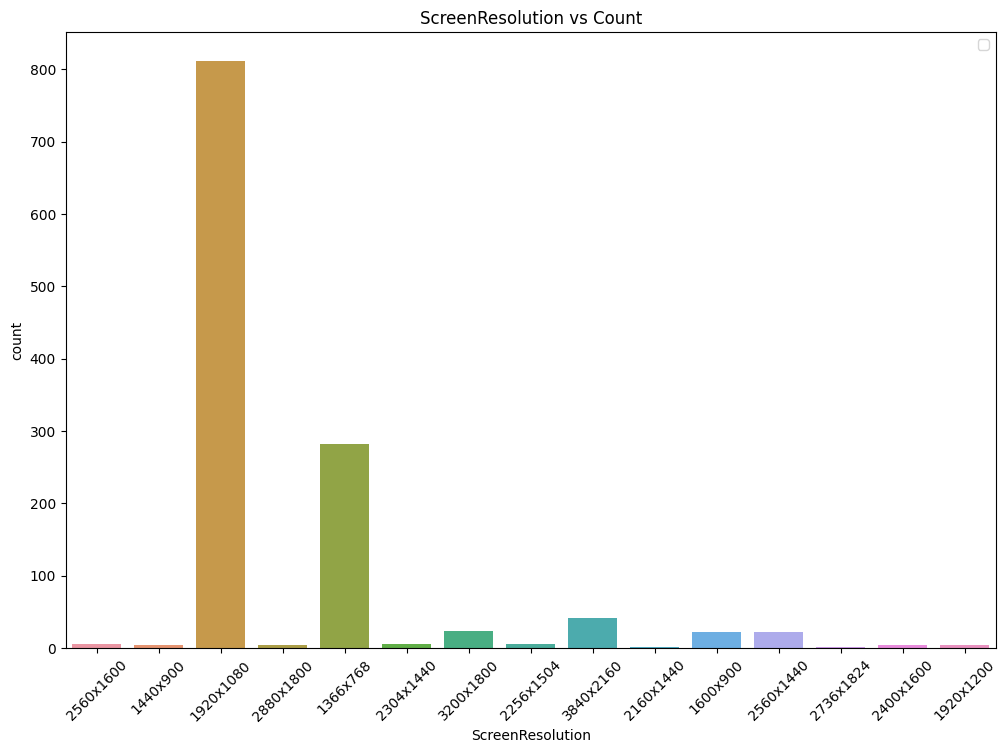

In [2865]:
# count plot of Screen Resolution
make_plot('ScreenResolution')

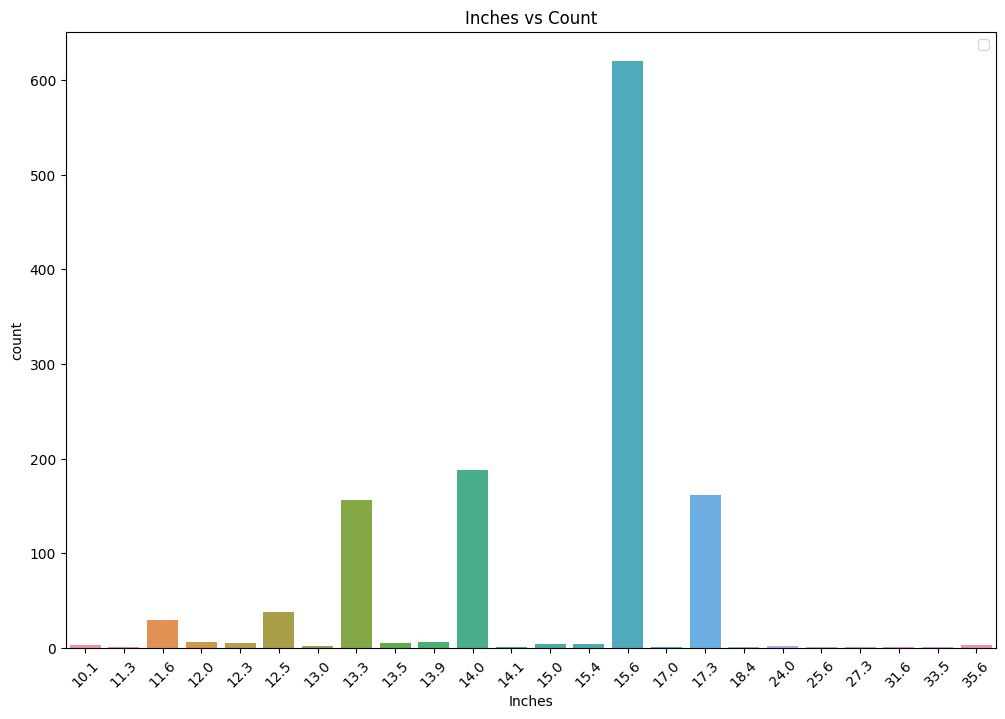

In [2866]:
# count plot of Inches
make_plot('Inches')

<Figure size 1200x500 with 0 Axes>

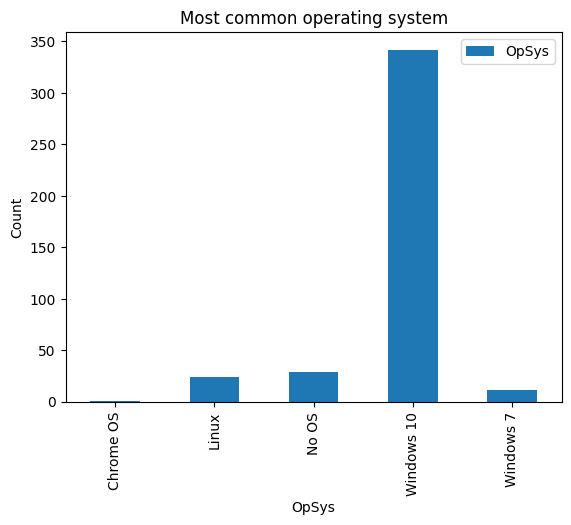

In [2867]:
# which operating system is used more for the most used inches (15.6) and screen resolution(1920x1080) 
plt.figure(figsize=(12,5))
df[(df['Inches']==15.6)&(df['ScreenResolution']=='1920x1080')].groupby(by='OpSys')[['OpSys']].count().plot(kind='bar')
plt.title("Most common operating system")
plt.ylabel("Count")
plt.show();

<Figure size 1200x800 with 0 Axes>

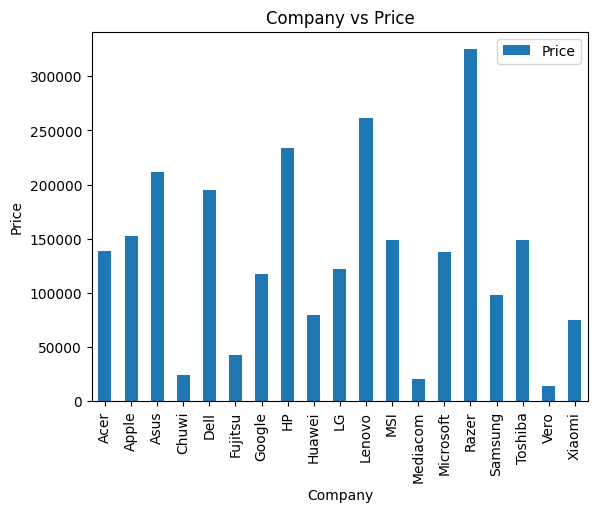

In [2868]:
# which company's laptop price is the most 
plt.figure(figsize=(12,8))
df.groupby(by='Company')[['Price']].max().plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Price')
plt.title('{} vs {}'.format('Company','Price'))
plt.legend()

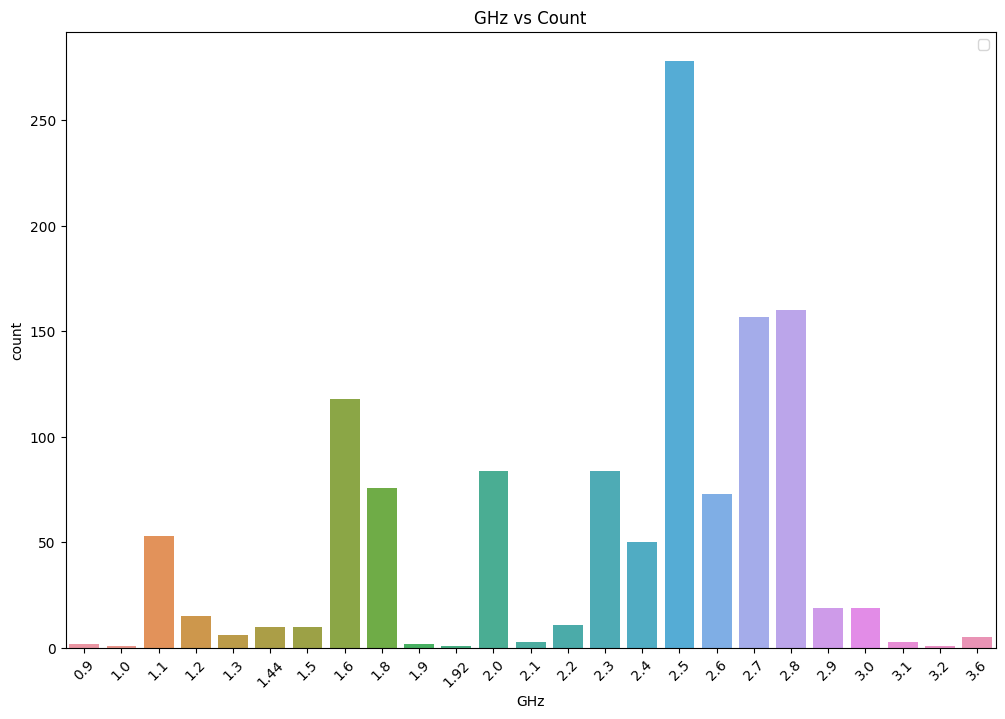

In [2869]:
# count plot of GHz
make_plot('GHz')

<Axes: xlabel='Ram,Memory(GB)'>

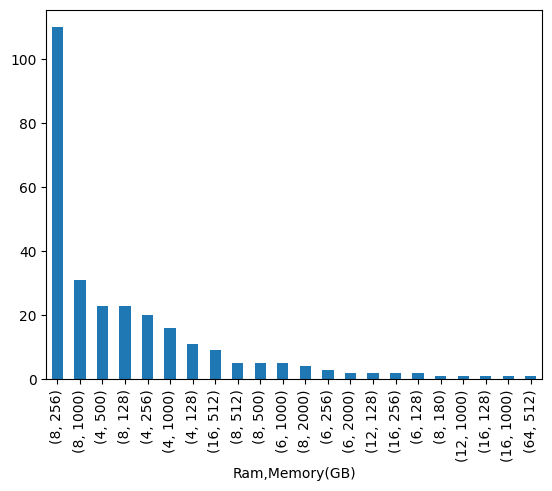

In [2870]:
df[df['GHz']==2.5][['Ram','Memory(GB)']].value_counts().plot(kind='bar')

In [2871]:
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Ram                   int64
OpSys                object
Weight              float64
Price               float64
GHz                 float64
Memory(GB)            int64
MemoryType           object
dtype: object

In [2872]:
# all the columns whose datatypes is object
cat_cols = df.select_dtypes(include = ['object']).columns.tolist()
cat_cols

['Company', 'TypeName', 'ScreenResolution', 'OpSys', 'MemoryType']

In [2873]:
# label encoding the dataframe
from sklearn.preprocessing import LabelEncoder

# creating a label encoder object
le = LabelEncoder()
for i in cat_cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])

In [2874]:
# correlation
df.corr()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,GHz,Memory(GB),MemoryType
Company,1.000000,0.003762,-0.040109,0.032370,0.042642,0.134050,-0.120720,0.137133,0.131794,-0.084314,0.154184
TypeName,0.003762,1.000000,-0.066712,-0.052427,-0.199570,0.085867,-0.214719,-0.127042,-0.089511,0.068606,-0.080779
Inches,-0.040109,-0.066712,1.000000,-0.073368,0.142536,0.023761,0.491198,0.042826,0.199191,0.180926,0.011084
ScreenResolution,0.032370,-0.052427,-0.073368,1.000000,0.378847,0.152271,-0.073107,0.537631,0.143963,-0.071340,0.344251
Ram,0.042642,-0.199570,0.142536,0.378847,1.000000,0.126855,0.286151,0.683478,0.331984,0.011312,0.371984
OpSys,0.134050,0.085867,0.023761,0.152271,0.126855,1.000000,0.012207,0.288590,0.218488,-0.047555,0.290239
Weight,-0.120720,-0.214719,0.491198,-0.073107,0.286151,0.012207,1.000000,0.177134,0.274899,0.144959,0.033193
Price,0.137133,-0.127042,0.042826,0.537631,0.683478,0.288590,0.177134,1.000000,0.426693,-0.124596,0.501692
GHz,0.131794,-0.089511,0.199191,0.143963,0.331984,0.218488,0.274899,0.426693,1.000000,0.053698,0.341203
Memory(GB),-0.084314,0.068606,0.180926,-0.071340,0.011312,-0.047555,0.144959,-0.124596,0.053698,1.000000,-0.495749


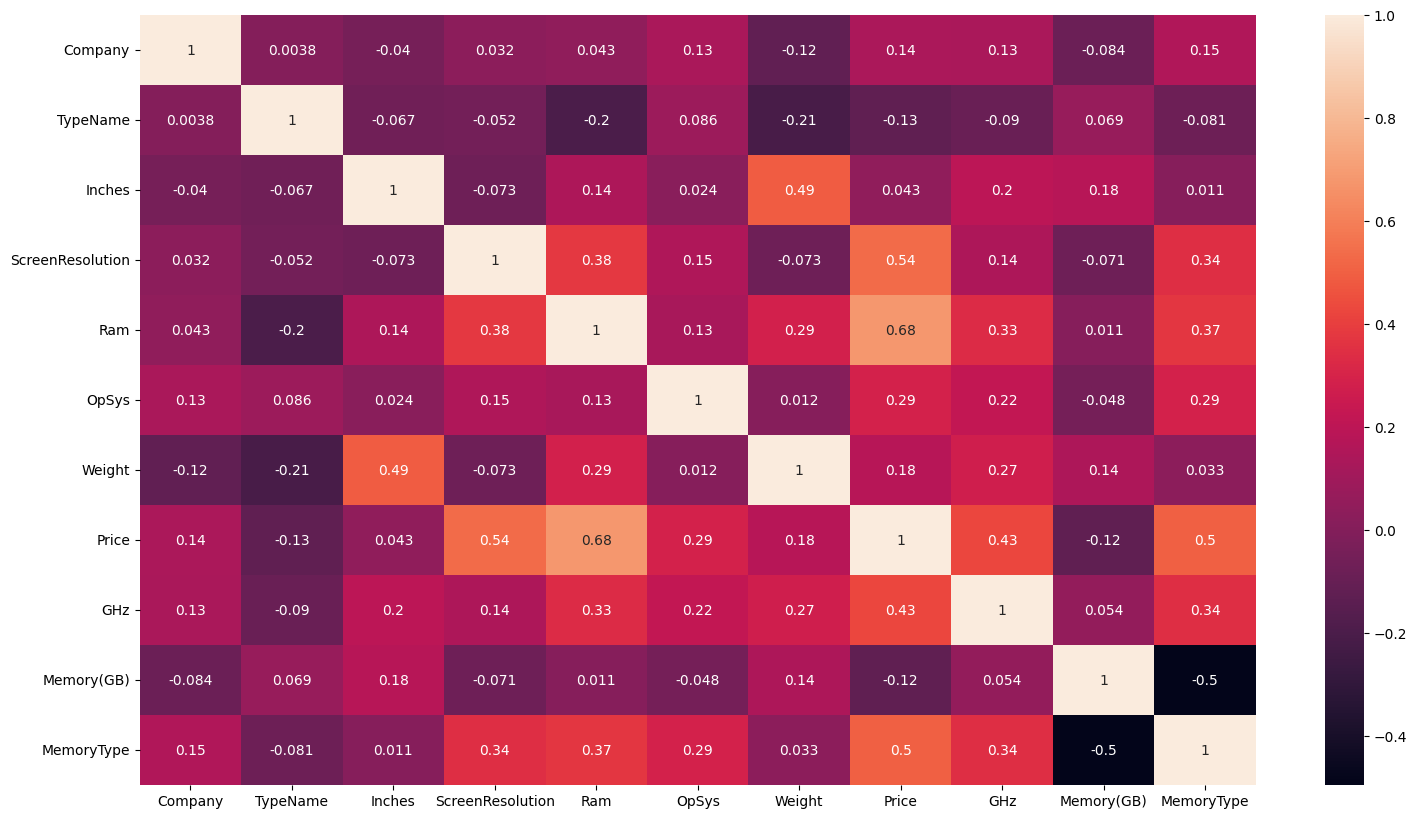

In [2875]:
# using seaborn heatmap to view correlation 
plt.figure(figsize=(18,10))  
p=sns.heatmap(df.corr(), annot=True)  

In [2876]:
class_counts = df['Price'].value_counts()
print('Class distribution:')
print(class_counts)

Class distribution:
95850.72    14
58554.72    14
79866.72    12
69210.72    11
26586.72    11
            ..
16197.12     1
40439.52     1
98994.24     1
61485.12     1
40705.92     1
Name: Price, Length: 775, dtype: int64


In [2877]:
# splitting x(train,test) and y(predict) data
y = df.pop('Price')
x = df

In [2878]:
x

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,GHz,Memory(GB),MemoryType
0,1,4,13.3,10,8,8,1.37,2.3,128,3
1,1,4,13.3,1,8,8,1.34,1.8,128,0
2,7,3,15.6,3,8,4,1.86,2.5,256,3
3,1,4,15.4,12,16,8,1.83,2.7,512,3
4,1,4,13.3,10,8,8,1.37,3.1,256,3
...,...,...,...,...,...,...,...,...,...,...
1269,2,3,15.6,0,4,5,2.20,2.5,500,1
1270,10,0,14.0,3,4,5,1.80,2.5,128,3
1271,10,0,13.3,13,16,5,1.30,2.5,512,3
1272,10,3,14.0,0,2,5,1.50,1.6,64,0


In [2879]:
y

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1269     38378.6496
1270     33992.6400
1271     79866.7200
1272     12201.1200
1273     40705.9200
Name: Price, Length: 1241, dtype: float64

In [2880]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2881]:
# using standard scaler to scale 
scaler = StandardScaler()
x[x.columns] = scaler.fit_transform(x[x.columns])

In [2882]:
x

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,GHz,Memory(GB),MemoryType
0,-1.327018,1.139616,-0.935210,2.242013,-0.093599,3.075137,-0.872250,-0.006903,-0.875204,0.705777
1,-1.327018,1.139616,-0.935210,-0.678566,-0.093599,3.075137,-0.909090,-0.998430,-0.875204,-2.165927
2,0.130353,0.336513,0.233823,-0.029548,-0.093599,-0.790393,-0.270528,0.389707,-0.516183,0.705777
3,-1.327018,1.139616,0.132168,2.891031,1.338217,3.075137,-0.307368,0.786318,0.201859,0.705777
4,-1.327018,1.139616,-0.935210,2.242013,-0.093599,3.075137,-0.872250,1.579539,-0.516183,0.705777
...,...,...,...,...,...,...,...,...,...,...
1269,-1.084123,0.336513,0.233823,-1.003075,-0.809507,0.175989,0.146994,0.389707,0.168201,-1.208692
1270,0.859039,-2.072793,-0.579417,-0.029548,-0.809507,0.175989,-0.344208,0.389707,-0.875204,0.705777
1271,0.859039,-2.072793,-0.935210,3.215539,1.338217,0.175989,-0.958211,0.389707,0.201859,0.705777
1272,0.859039,0.336513,-0.579417,-1.003075,-1.167461,0.175989,-0.712610,-1.395040,-1.054715,-2.165927


In [2883]:
x.describe()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,GHz,Memory(GB),MemoryType
count,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03,1.241000e+03
mean,1.030602e-16,-8.588349e-17,-8.015792e-17,2.075518e-17,1.860809e-17,-1.789239e-16,-1.488647e-16,1.145113e-17,3.292200e-17,-1.832181e-16
std,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00,1.000403e+00
min,-1.569913e+00,-2.072793e+00,-2.561691e+00,-1.003075e+00,-1.346438e+00,-4.655924e+00,-2.554372e+00,-2.783177e+00,-1.211786e+00,-2.165927e+00
25%,-5.983325e-01,-1.269691e+00,-5.794174e-01,-2.954834e-02,-8.095066e-01,1.759891e-01,-7.126095e-01,-6.018191e-01,-5.161832e-01,-1.208692e+00
50%,1.303531e-01,3.365134e-01,2.338230e-01,-2.954834e-02,-9.359875e-02,1.759891e-01,-4.948654e-02,3.897075e-01,-5.161832e-01,7.057774e-01
75%,8.590387e-01,3.365134e-01,2.338230e-01,-2.954834e-02,-9.359875e-02,1.759891e-01,3.066351e-01,7.863181e-01,2.018589e-01,7.057774e-01
max,2.802200e+00,1.942718e+00,1.039933e+01,3.540048e+00,9.929111e+00,3.075137e+00,1.107624e+01,2.571066e+00,4.375479e+00,7.057774e-01


In [2884]:
# splitting training and testing data
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.3,random_state=47)

In [2885]:
x_train.shape

(868, 10)

In [2886]:
x_test.shape

(373, 10)

In [2887]:
x.shape

(1241, 10)

In [2888]:
# creating object for linear regression 
lr  = LinearRegression()
model = lr.fit(x_train,y_train)

In [2889]:
# accuracy 70%
from sklearn.metrics import r2_score
r2_score(y_train,model.predict(x_train))*100

70.53582286949751